***Life Expectancy Analysis***

Importing Libraries and Load Data

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("/content/Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Checking Column Names

In [85]:
print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


Cleaning all column names again just in case

In [86]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print(df.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


Understanding Missing Values

In [87]:
df.columns = df.columns.str.strip()
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0
population,652
hepatitis_b,553
gdp,448
total_expenditure,226
alcohol,194
income_composition_of_resources,167
schooling,163
thinness__1-19_years,34
thinness_5-9_years,34
bmi,34


Handling Missing Values



1.   Droping rows where Life expectancy is missing (target variable)
2.   Filling numeric columns with appropriate strategy
3.   Total expenditure: first by country mean, then fallback to global mean
4.   Schooling: first by country mean, then fallback to global mean
5.   Using global mean for remaining features



In [88]:
#1
df = df[df['life_expectancy'].notnull()]

#2
df['population'] = df['population'].fillna(df['population'].median())
df['hepatitis_b'] = df['hepatitis_b'].fillna(df.groupby('status')['hepatitis_b'].transform('mean'))
df['gdp'] = df['gdp'].fillna(df.groupby('status')['gdp'].transform('median'))
df['alcohol'] = df['alcohol'].fillna(df.groupby('status')['alcohol'].transform('mean'))
df['income_composition_of_resources'] = df['income_composition_of_resources'].fillna(df['income_composition_of_resources'].mean())

#3
df['total_expenditure'] = df.groupby('country')['total_expenditure'].transform(
    lambda x: x.fillna(x.mean()))
df['total_expenditure'] = df['total_expenditure'].fillna(df['total_expenditure'].mean())

#4
df['schooling'] = df.groupby('country')['schooling'].transform(
    lambda x: x.fillna(x.mean()))
df['schooling'] = df['schooling'].fillna(df['schooling'].mean())

#5
for col in ['thinness__1-19_years', 'thinness_5-9_years', 'bmi', 'diphtheria', 'polio', 'adult_mortality']:
    df[col] = df[col].fillna(df[col].mean())

/tmp/ipython-input-45267639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population'] = df['population'].fillna(df['population'].median())
/tmp/ipython-input-45267639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hepatitis_b'] = df['hepatitis_b'].fillna(df.groupby('status')['hepatitis_b'].transform('mean'))
/tmp/ipython-input-45267639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Confirming no missing values remain

In [89]:
print("Remaining missing values:\n", df.isnull().sum().sum())

Remaining missing values:
 0


Summary Statistics

In [90]:
print("Life Expectancy Summary:\n", df['life_expectancy'].describe())

Life Expectancy Summary:
 count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: life_expectancy, dtype: float64


Correlation Matrix

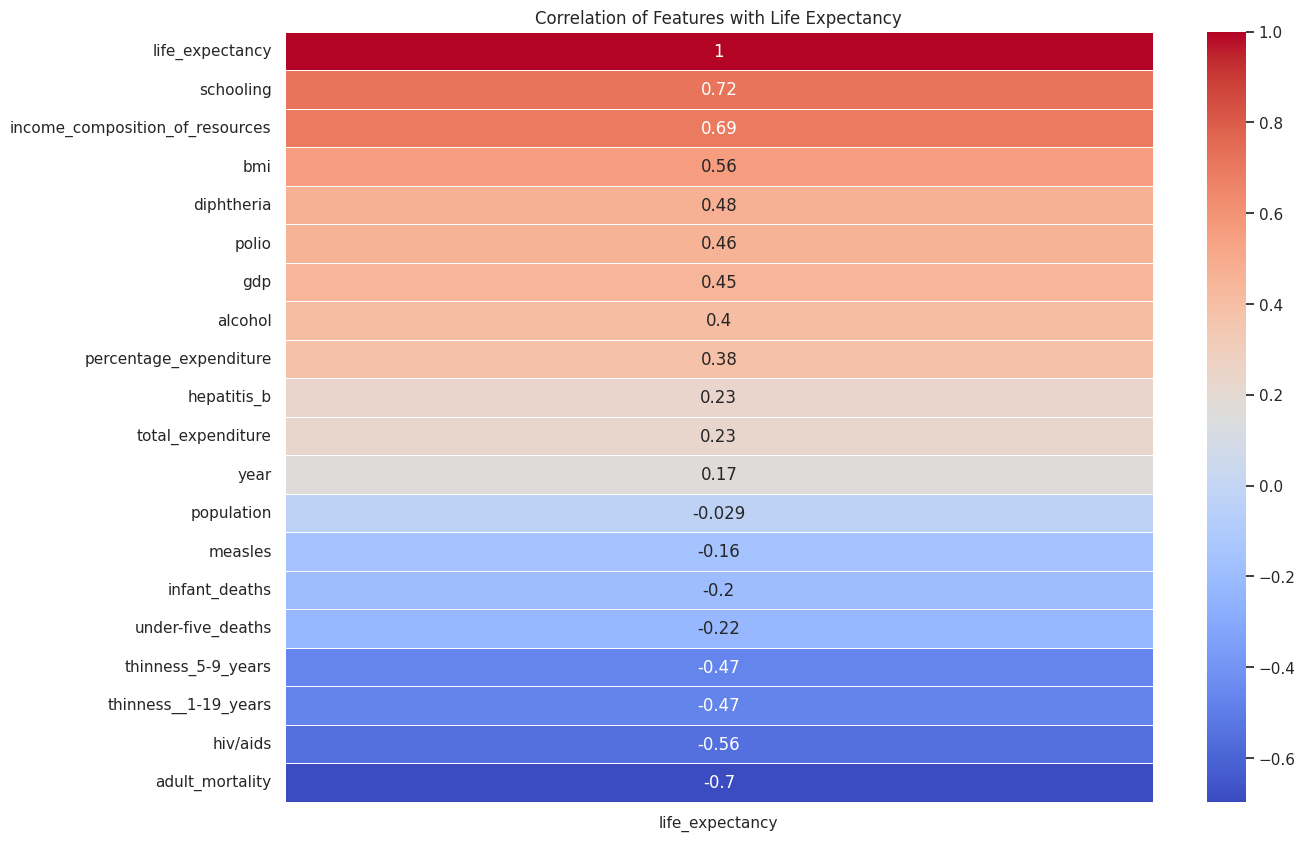

In [91]:
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr[['life_expectancy']].sort_values(by='life_expectancy', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with Life Expectancy")
plt.show()

Compare Life Expectancy by Status

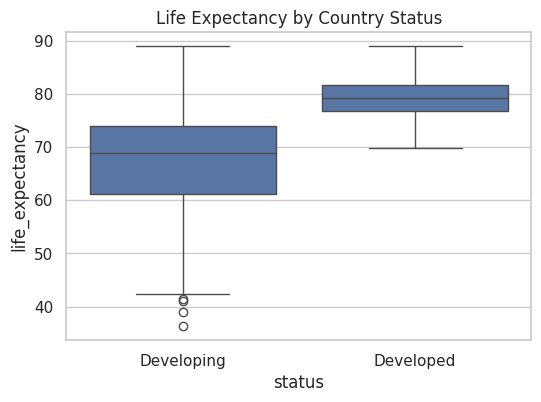

In [92]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='life_expectancy', data=df)
plt.title("Life Expectancy by Country Status")
plt.show()

Impact of Schooling

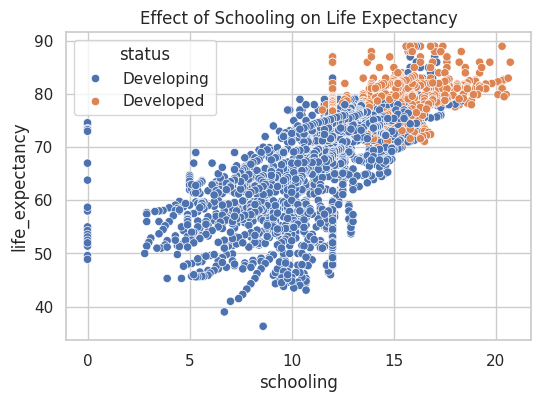

In [93]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='schooling', y='life_expectancy', data=df, hue='status')
plt.title("Effect of Schooling on Life Expectancy")
plt.show()

Impact of Alcohol Consumption

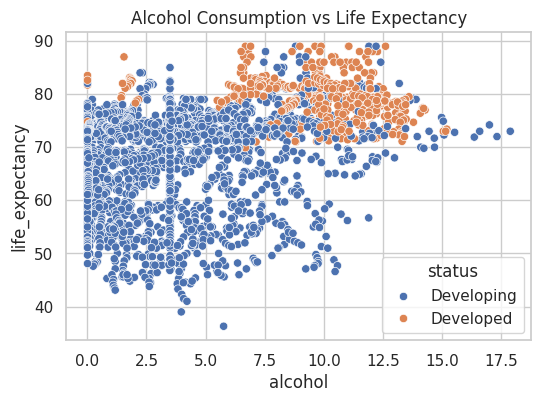

In [94]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='alcohol', y='life_expectancy', data=df, hue='status')
plt.title("Alcohol Consumption vs Life Expectancy")
plt.show()

Infant Mortality vs Life Expectancy

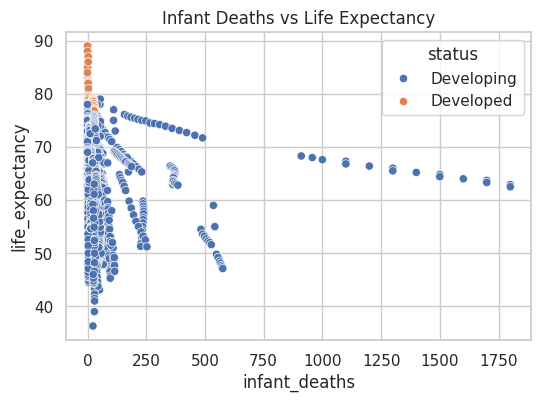

In [95]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='infant_deaths', y='life_expectancy', data=df, hue='status')
plt.title("Infant Deaths vs Life Expectancy")
plt.show()

Immunization Coverage

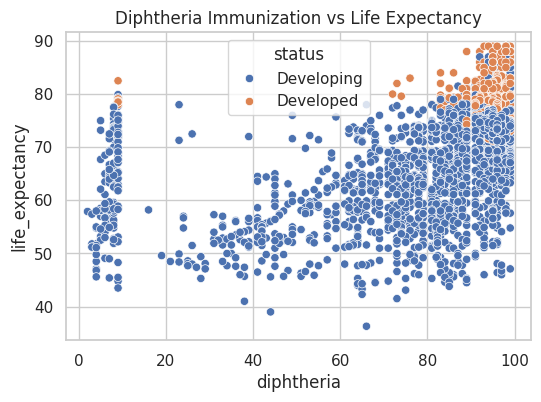

In [96]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='diphtheria', y='life_expectancy', data=df, hue='status')
plt.title("Diphtheria Immunization vs Life Expectancy")
plt.show()

BMI and Adult Mortality

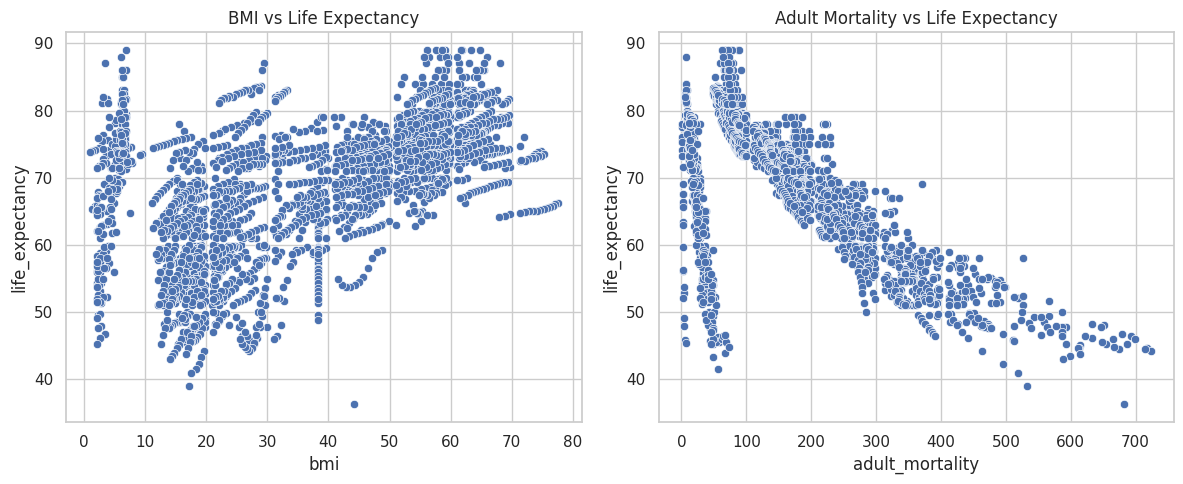

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='bmi', y='life_expectancy', data=df, ax=axs[0])
axs[0].set_title("BMI vs Life Expectancy")

sns.scatterplot(x='adult_mortality', y='life_expectancy', data=df, ax=axs[1])
axs[1].set_title("Adult Mortality vs Life Expectancy")

plt.tight_layout()
plt.show()

Schooling has a strong positive correlation with longer life.

Adult mortality and infant deaths reduce life expectancy significantly.

Healthcare spending, immunization rates, and nutrition (BMI) are major contributors.

Developing countries showed significantly lower life expectancy than developed ones.



T-Test Between Developed and Developing Countries

In [98]:
from scipy.stats import ttest_ind

developed = df[df['status'] == 'Developed']['life_expectancy']
developing = df[df['status'] == 'Developing']['life_expectancy']

t_stat, p_val = ttest_ind(developed, developing, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Significant difference in life expectancy between developed and developing countries.")
else:
    print("No significant difference found.")

T-statistic: 47.87, P-value: 0.0000
Significant difference in life expectancy between developed and developing countries.


Simple Regression Line: GDP vs Life Expectancy

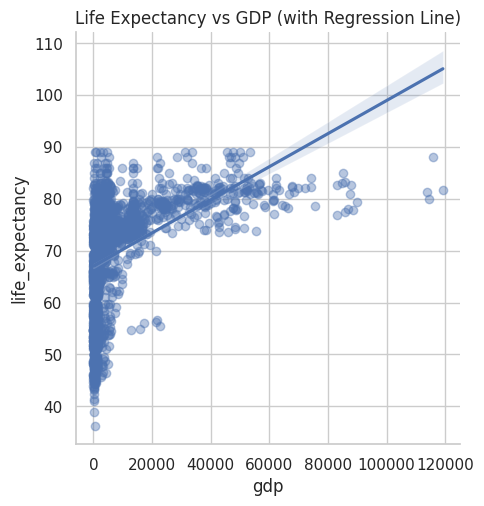

In [99]:
import seaborn as sns
sns.lmplot(data=df, x='gdp', y='life_expectancy', scatter_kws={'alpha':0.4})
plt.title("Life Expectancy vs GDP (with Regression Line)")
plt.show()

Outlier Detection using IQR

In [100]:
Q1 = df['life_expectancy'].quantile(0.25)
Q3 = df['life_expectancy'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['life_expectancy'] < Q1 - 1.5*IQR) | (df['life_expectancy'] > Q3 + 1.5*IQR)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 10


Policy Simulation


What happens if we increase schooling by 2 years for developing countries?

In [101]:
df_sim = df.copy()
df_sim['schooling_plus_2'] = df_sim['schooling'] + 2
before = df_sim['schooling'].corr(df_sim['life_expectancy'])
after = df_sim['schooling_plus_2'].corr(df_sim['life_expectancy'])

print(f"Correlation before increase: {before:.2f}")
print(f"Correlation after schooling +2: {after:.2f}")

Correlation before increase: 0.72
Correlation after schooling +2: 0.72


In [102]:
import shap
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

Encode and Scale

In [103]:
le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])
df['status'] = LabelEncoder().fit_transform(df['status'])

X = df.drop(['life_expectancy'], axis=1)
y = df['life_expectancy']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train Models

In [104]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R2 Score': r2, 'RMSE': rmse})

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

               Model  R2 Score      RMSE
0      Random Forest  0.968825  1.642151
2            XGBoost  0.967098  1.687011
1  Gradient Boosting  0.950275  2.073938


Visualize Model Performance

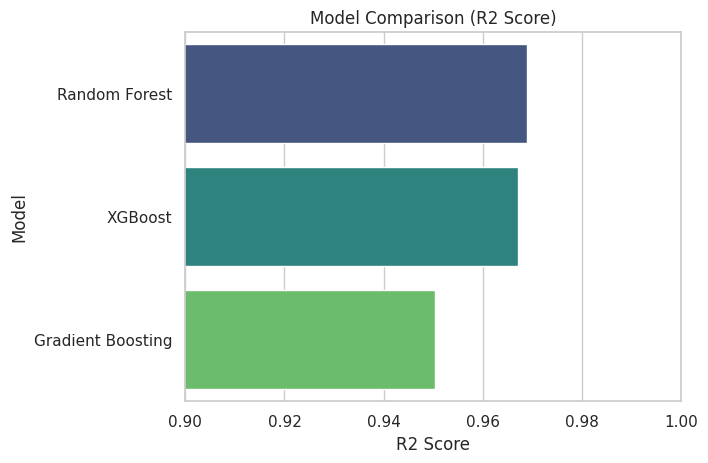

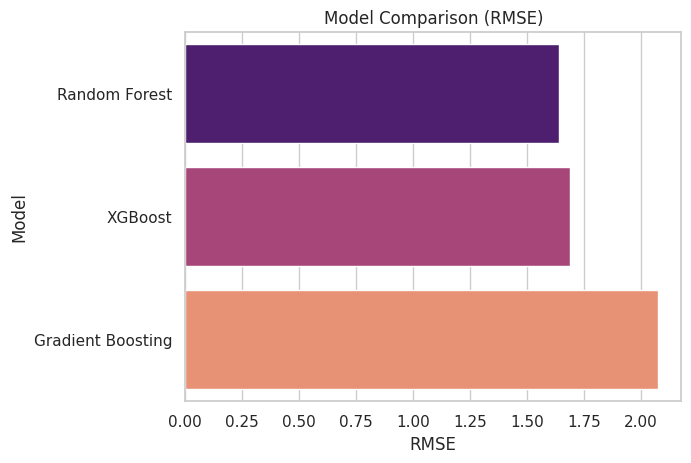

In [105]:
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison (R2 Score)")
plt.xlim(0.9, 1)
plt.show()

sns.barplot(x='RMSE', y='Model', data=results_df, palette='magma')
plt.title("Model Comparison (RMSE)")
plt.show()

Cross-Validation on Best Model

In [106]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_scaled, y, cv=kf, scoring='r2')
print(f"Cross-validated R2 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated R2 Score: 0.9655 ± 0.0057


Final Evaluation

In [107]:
y_pred = best_model.predict(X_test)
print("Final Evaluation on Test Set:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

Final Evaluation on Test Set:
R² Score: 0.9688
RMSE: 1.6422
MAE: 1.0245


SHAP Explainability

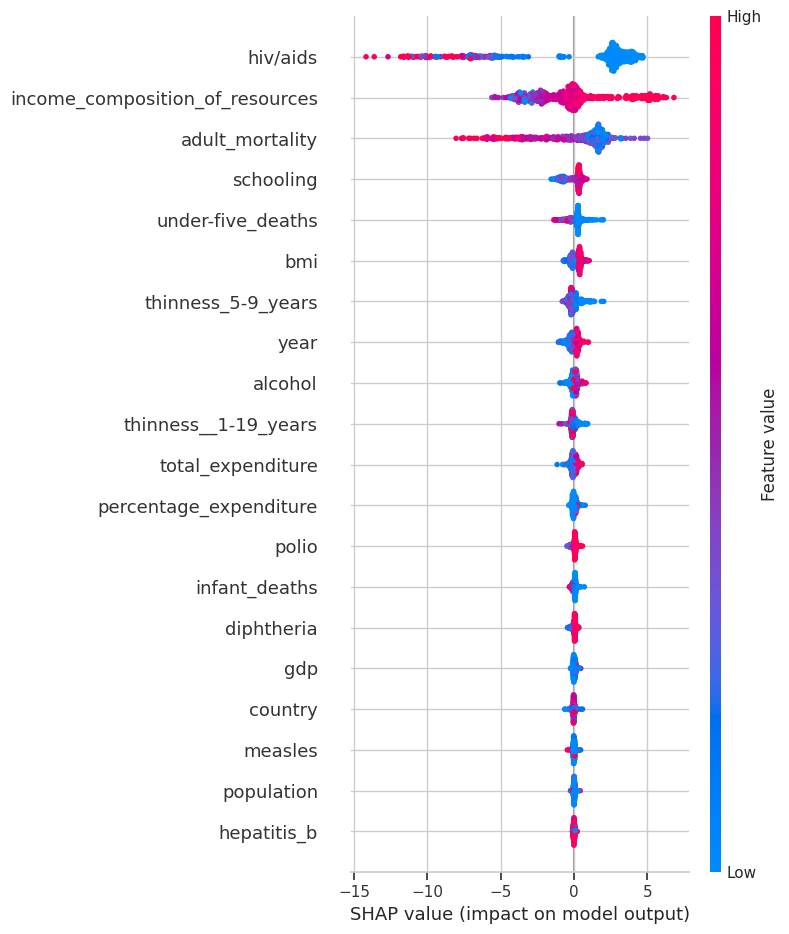

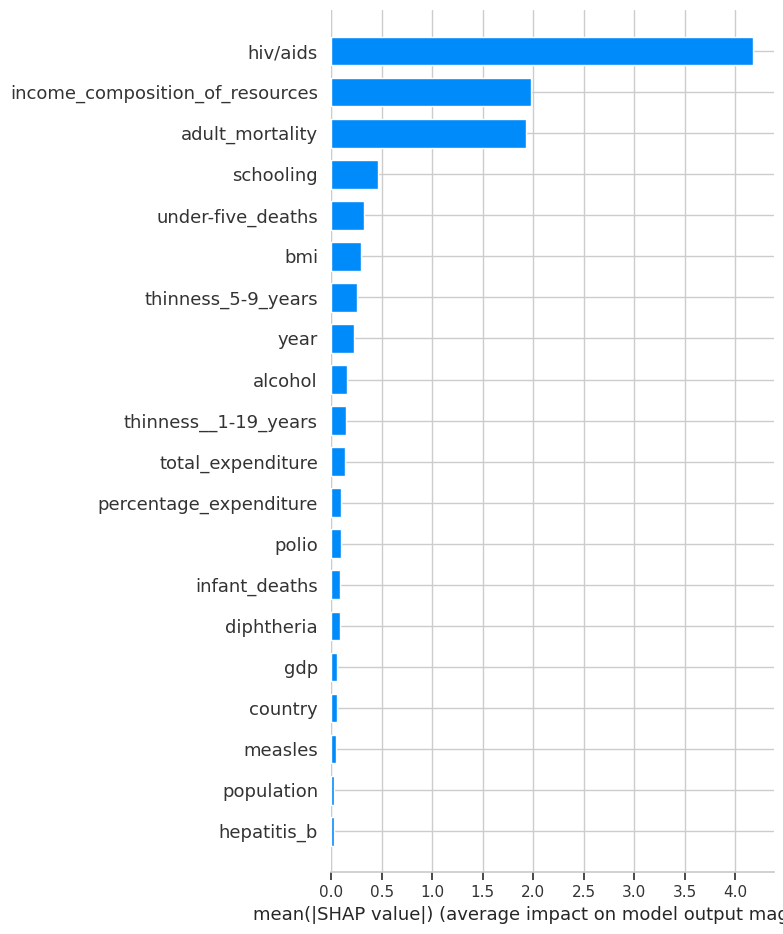

In [108]:
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP bar plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")

Median and Mode of test set

In [109]:
# Final prediction on one sample
predicted_life = best_model.predict(X_test[0].reshape(1, -1))[0]
median_life_expectancy = y_test.median()
mode_life_expectancy = y_test.mode().iloc[0]  # If multiple modes, take the first

Life Expectancy Prediction vs Dataset Statistics

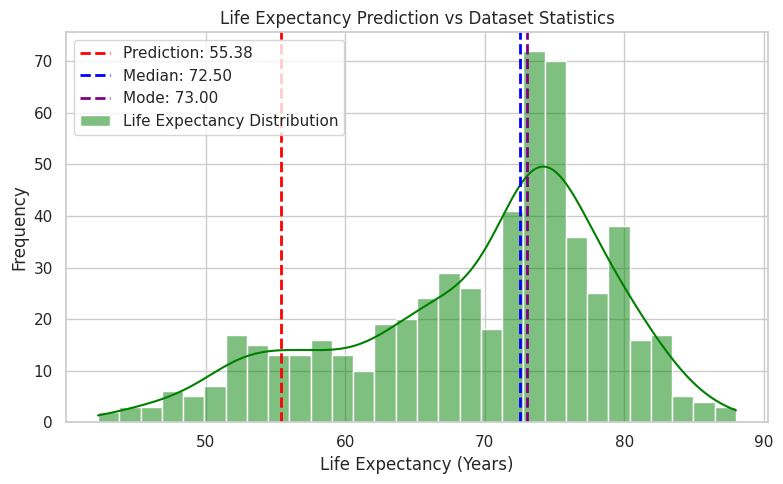

In [110]:
plt.figure(figsize=(8, 5))
sns.histplot(y_test, bins=30, kde=True, color='green', label='Life Expectancy Distribution')

plt.axvline(predicted_life, color='red', linestyle='--', linewidth=2, label=f'Prediction: {predicted_life:.2f}')
plt.axvline(median_life_expectancy, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_life_expectancy:.2f}')
plt.axvline(mode_life_expectancy, color='purple', linestyle='--', linewidth=2, label=f'Mode: {mode_life_expectancy:.2f}')
plt.title("Life Expectancy Prediction vs Dataset Statistics")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()